In [2]:
import csv
import wget
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import os
import numpy as np
from collections import defaultdict


Load the data

The “gene effect” file contains the corrected CERES scores, which measure the effect size of knocking out a gene, normalized against the distributions of non-essential and pan-essential genes. Columns are genes, rows are cell lines. A more negative CERES score indicates depletion of the gene in that cell line, indicating that it is an essential gene for cell viability.

For simplicity, we call a gene "effective", if the effect size of that gene is below -0.5.


In [3]:
url = 'https://ndownloader.figshare.com/files/14221385'
filename = 'D:/Uni/JAX/SL/IDGKG-gen/data/gene_effect_corrected.csv' # path to the file

if not os.path.exists(filename):
    filename = wget.download(url)

In [4]:
df = pd.read_csv(filename, index_col=0)
df.head()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZUFSP (221302),ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000004,0.134645,0.075536,-0.140209,0.013928,0.029131,-0.147284,0.275829,-0.363633,0.250165,0.129743,...,-0.125018,-0.145802,-0.095429,-0.396903,0.205685,0.197798,-0.347782,0.212048,0.202099,-0.123465
ACH-000005,-0.212445,0.233124,0.044365,0.173837,-0.124389,-0.298849,0.120260,-0.339925,-0.011309,0.015660,...,-0.142212,-0.377179,-0.109019,-0.544686,0.126581,0.033066,-0.060746,0.443834,-0.091548,0.065104
ACH-000007,0.043318,0.066838,-0.036197,0.134781,0.082996,0.119084,0.057116,-0.352541,-0.005800,0.241488,...,-0.063270,-0.469378,-0.068437,-0.207803,0.158380,0.001434,-0.255654,0.065777,-0.314659,-0.358418
ACH-000009,0.070512,0.008430,0.027114,0.055927,0.046325,0.015968,0.053502,-0.498860,0.110794,0.066921,...,0.114418,-0.374999,-0.204950,-0.196839,0.043411,0.018276,-0.398310,0.151885,-0.124333,-0.391758
ACH-000011,0.190935,0.083952,-0.000741,0.353375,-0.037044,-0.205803,0.071275,-0.317310,0.099824,0.105539,...,0.052517,-0.510975,-0.345998,-0.408631,0.241005,0.141594,-0.177939,0.092722,-0.161591,-0.329937


Map symbols to ensembl IDs:

In [5]:
symbol_lookup = defaultdict(str)
with open( '../lookup/lookup.txt', 'r') as f:
        next(f)  # skip header
        for line in f:
            fields = line.split('\t')
            symbol = fields[0]
            ncbi_id = fields[1]
            ensembl = fields[2]
            symbol_lookup[symbol] = ensembl

In [6]:
new_columns = []
for i in list(df.columns):
    symbol = i.split(" ")[0]
    ens_ID = symbol_lookup[symbol]
    new_columns.append(ens_ID)

ensembl_df = df.copy()
ensembl_df.columns = new_columns   # somehow also changes the column names of df?!?!?!!?

In [7]:
ensembl_df.shape

(558, 17634)

Get rid of columns without ensembl ID entry:

In [8]:
for i in range(ensembl_df.shape[1]):
    if i == ensembl_df.shape[1]:
        break
    col = ensembl_df.iloc[:,i]
    if col.name == "":
        del ensembl_df[col.name]

In [9]:
print("genes in original df: {}".format(df.shape[1]))
print("genes in ensembl_df: {}".format(ensembl_df.shape[1]))
print("=> percent of mapped genes: {}".format(ensembl_df.shape[1] / df.shape[1]))

genes in original df: 17634
genes in ensembl_df: 16732
=> percent of mapped genes: 0.948848814789611


In [10]:
# ensembl_df.to_csv('ensembl_df.csv')
ensembl_df.head()

,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000184389,ENSG00000128274,ENSG00000118017,ENSG00000094914,ENSG00000081760,ENSG00000114771,...,ENSG00000214941,ENSG00000214655,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
ACH-000004,0.134645,0.075536,-0.140209,0.013928,0.029131,-0.147284,0.275829,-0.363633,0.250165,0.129743,...,-0.173068,-0.124833,-0.145802,-0.095429,-0.396903,0.205685,0.197798,-0.347782,0.212048,0.202099
ACH-000005,-0.212445,0.233124,0.044365,0.173837,-0.124389,-0.298849,0.120260,-0.339925,-0.011309,0.015660,...,-0.157870,-0.127058,-0.377179,-0.109019,-0.544686,0.126581,0.033066,-0.060746,0.443834,-0.091548
ACH-000007,0.043318,0.066838,-0.036197,0.134781,0.082996,0.119084,0.057116,-0.352541,-0.005800,0.241488,...,-0.154457,-0.105315,-0.469378,-0.068437,-0.207803,0.158380,0.001434,-0.255654,0.065777,-0.314659
ACH-000009,0.070512,0.008430,0.027114,0.055927,0.046325,0.015968,0.053502,-0.498860,0.110794,0.066921,...,-0.329543,-0.147972,-0.374999,-0.204950,-0.196839,0.043411,0.018276,-0.398310,0.151885,-0.124333
ACH-000011,0.190935,0.083952,-0.000741,0.353375,-0.037044,-0.205803,0.071275,-0.317310,0.099824,0.105539,...,-0.317330,-0.104482,-0.510975,-0.345998,-0.408631,0.241005,0.141594,-0.177939,0.092722,-0.161591


In [19]:
gene_effect_threshold = -0.5 #threshold from which genes are considered effective
cell_proportion_geneA_threshold = 0.4  #proportion of cells, geneA is considered effective in -> geneB must be effective in rest
general_cell_coverage = 0.8  # proportion of cell lines covered by geneA and geneB

TypeError: '<' not supported between instances of 'builtin_function_or_method' and 'float'

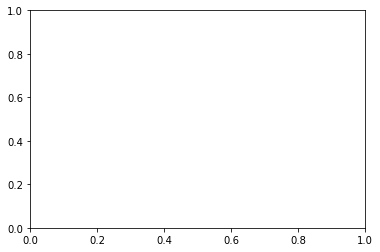

In [27]:
effective_cells_per_gene = defaultdict(str)
number_effective_cells_per_gene = defaultdict(int)


# get effective cell lines for each gene
for i in range(ensembl_df.shape[1]):
    col_gene = ensembl_df.iloc[:,i]
    effective_cells = col_gene.loc[col_gene < gene_effect_threshold]
    effective_cells_per_gene[col_gene.name] = effective_cells
    number_effective_cells_per_gene[col_gene.name] = len(effective_cells)



[]

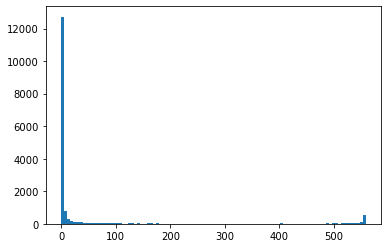

In [30]:
plt.hist(number_effective_cells_per_gene.values(), bins = 100 )
plt.plot()

In [13]:
def intersection(lst1, lst2):
    return [value for value in lst1 if value in set(lst2)]

In [25]:
data = defaultdict(str)

# build SL dataframe
for i in range(300, ensembl_df.shape[1]):
    if i % 10 == 0:
        print("Gene A: {}".format(i))
    col_geneA = ensembl_df.iloc[:,i]  
    
    cell_proportion_geneA = number_effective_cells_per_gene[col_geneA.name] / ensembl_df.shape[0]
    if not (0 < cell_proportion_geneA < cell_proportion_geneA_threshold):
        continue
    effective_cells_geneA = effective_cells_per_gene[col_geneA.name]

    for j in range(ensembl_df.shape[1]):
        if i != j:
            col_geneB = ensembl_df.iloc[:,j]
            min_coverage_gene_B = general_cell_coverage * ensembl_df.shape[1] - number_effective_cells_per_gene[col_geneA.name]
            if number_effective_cells_per_gene[col_geneB.name] < min_coverage_gene_B:
                if j % 3000 == 0:
                    print(min_coverage_gene_B)
                continue
            effective_cells_geneB = effective_cells_per_gene[col_geneB.name]
            
            intersect = len(intersection(effective_cells_geneA, effective_cells_geneB))
            cells_covered = number_effective_cells_geneA + number_effective_cells_geneB - intersect
            print("hello I'm here!!!")
            if cells_covered/ensembl_df.shape[0] > general_cell_coverage:
                if data[col_geneB.name] == col_geneA.name:
                    continue
                else:
                    data[col_geneA.name] = col_geneB.name
                    print(data)
                
sl_pairs = pd.DataFrame.from_dict(data, orient='index', columns=["gene_A", "gene_B"])
sl_pairs.head()

Gene A: 300
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
Gene A: 310
6690.8
6690.8
6690.8
6690.8
6690.8
6690.8
6690.8
6690.8
6690.8
6690.8
6690.8
6690.8
6568.8
6568.8
6568.8
6568.8
6568.8
6568.8
Gene A: 320
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8
6691.8


KeyboardInterrupt: 

In [ ]:
gene_effect_threshold = -0.5 #threshold from which genes are considered effective
proportion_threshold = 0.25  #threshold below which proportion of cells, genes are considered for SL Interaction


effective_genes_with_right_prop = [] #list of effective genes with proportion below threshold
proportion_effective_genes_in_cell_lines = [] 
number_effective_genes = 0 #number of genes with at least one effect size below threshold
number_effective_genes_in_all_cell_lines = 0 #number of genes with effect sizes less than threshold in all cell lines.


for i in range(1,df.shape[1]):
    col = df.columns[i]
    df_col = df.loc[:,col]  #dataframe corresponding to a gene (column)
    
    gene_effect_df = df_col.loc[df.loc[:,col] < gene_effect_threshold] #dataframe corresponding to a gene(column) with effect sizes below threshold
    proportion_effective_gene_in_cell_lines = gene_effect_df.shape[0] / df.shape[0]
    
    if i % 1500 == 0:
        print(gene_effect_df.index)
    
    if 0 < proportion_effective_gene_in_cell_lines < proportion_threshold:
        number_effective_genes += 1
        effective_genes_with_right_prop.append(i)
        proportion_effective_genes_in_cell_lines.append(proportion_effective_gene_in_cell_lines)
        
print("Number of genes where 0 < proportion of cells with effect < " + 
      str(proportion_threshold) + ": {}".format(number_effective_genes))

So from 9480 genes with effect size smaller than -0.5 in at least one cell line, in 7544 cell lines the proportion of cell lines being effective is below the proportion_threshold!

In [49]:
prop_df = df.iloc[:,effective_genes_with_right_prop]   # df with all genes with the right proportion

In [95]:
prop_df.shape

(558, 7544)

To get the synthetic lethal genes, we are interested in genes, where gene_A is effective in all cell lines, where Ggene_B is not effective, but gene_B has to be effective in the other cell lines!

In [ ]:
sl_pairs.to_csv

In [ ]:
df.to_csv('file.csv', header=False, index=False)